In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

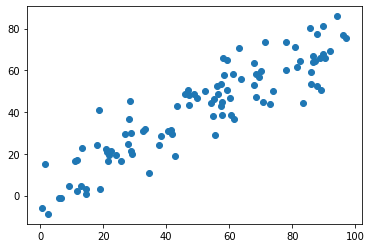

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

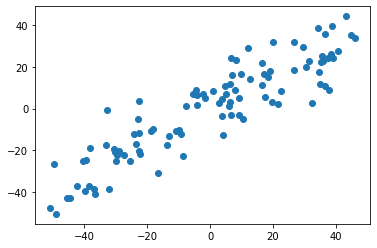

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

-6.679101716144941e-15

In [8]:
np.mean(X_demean[:,1])

1.9610979506978764e-14

# 梯度上升法

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2))/len(X)

In [10]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. /len(X)

In [12]:
def df_debug(w, x, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X))/(2*epsilon)
    return res

In [14]:
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w) 
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [15]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([0.82955916, 0.25117726])

In [16]:
eta = 0.001

In [17]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.775661  , 0.63114975])

In [20]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

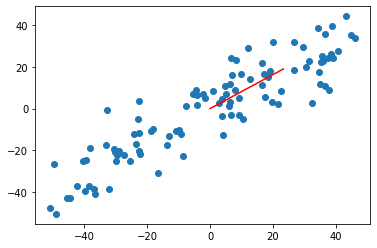

In [22]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

In [24]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.